# No-skill tiles

Some classifiers may always return the same value. This can occur when dealing with largely unbiased datasets for instance.

In this notebook, we explore the specific case in which the data distribution and the model predictions follow distributions that are iid.

Considering:
- $\hat{P}(+)$: the probability of a model to yield a positive.
- $\pi_+$: the probability to encounter a data instance corresponding to the positive class.

One can see that ...

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

from sorbetto.performance.two_class_classification_performance import TwoClassClassificationPerformance
from sorbetto.parameterization.parameterization_default import ParameterizationDefault
from sorbetto.flavor.value_flavor import ValueFlavor
from sorbetto.tile.value_tile import ValueTile

In [3]:
def get_perf_no_skill(prior_pos = 0.5, proba_model_pos = 0.5):

    prior_neg = 1 - prior_pos
    proba_model_neg = 1 - proba_model_pos

    ptp = proba_model_pos * prior_pos
    ptn = proba_model_neg * prior_neg
    pfn = proba_model_neg * prior_pos
    pfp = proba_model_pos * prior_neg


    return TwoClassClassificationPerformance(ptp, pfn, pfp, ptn, name = 'No-skill Performance')

perf = get_perf_no_skill(prior_pos = 0.3, proba_model_pos = .3)
print(perf)

TwoClassClassificationPerformance(name=No-skill Performance, ptn=0.09, pfp=0.21, pfn=0.21, ptp=0.48999999999999994)


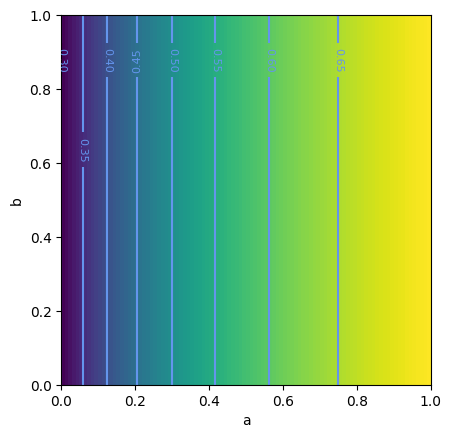

In [4]:
# Creating an example

param = ParameterizationDefault()
flavor = ValueFlavor(perf)
tile = ValueTile(flavor = flavor, parameterization = param, performance =perf, name = "value tile")

a, b = np.linspace(0,1,100), np.linspace(0,1,100)
a2, b2 = np.meshgrid(a, b)
mat = tile(a2, b2)

fig, ax = plt.subplots()

def display_tile(fig, ax, mat):

    ax.imshow(mat, extent=[0, 1, 0, 1], origin='lower', aspect='auto')
    cs = ax.contour(
        a, b, mat,
        levels=np.linspace(0, 1, 21),
        colors="cornflowerblue"
    )
    ax.clabel(cs, inline=True, fontsize=8)

    # Axis labels
    ax.set_xlabel('a')
    ax.set_ylabel('b')

    ax.set_aspect('equal', adjustable='box')

display_tile(fig, ax, mat)

plt.show()

To explore how the value tile change when the priors and the model probabilities change, the next cell provides you with an interactive plot.

Please note that when $\pi_+ = P(+) = 0.5$, the tile is a uniform square.

You can also check that when $\pi = 0.1$ and $P(+) = 0.9$, you obtain horizontal lines. 

When $\pi = P(+) = 0.9$, you obtain vertical lines.

In [76]:
%matplotlib tk

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)  # leave space for sliders

a = np.linspace(0, 1, 100)
b = np.linspace(0, 1, 100)
a2, b2 = np.meshgrid(a, b)

prior_ax = fig.add_axes([0.2, 0.1, 0.6, 0.03])
prior_pos_slider = Slider(
    ax=prior_ax,
    label='$\pi_+$',
    valmin=0.0,
    valmax=1.0,
    valinit=0.5,
    valstep=0.01,
    orientation='horizontal'
)

proba_ax = fig.add_axes([0.2, 0.05, 0.6, 0.03])
proba_model_slider = Slider(
    ax=proba_ax,
    label='P(+)',
    valmin=0.0,
    valmax=1.0,
    valinit=0.5,
    valstep=0.01,
    orientation='horizontal'
)

def plot_tile(_=None):
    prior_val = prior_pos_slider.val
    proba_model_val = proba_model_slider.val

    perf = get_perf_no_skill(prior_pos=prior_val, proba_model_pos=proba_model_val)
    flavor = ValueFlavor(perf)
    value_tile = ValueTile(flavor=flavor, parameterization=param, performance=perf, name="value tile")
    mat = value_tile(a2, b2)

    ax.clear()
    display_tile(fig, ax, mat)
    fig.canvas.draw_idle()

prior_pos_slider.on_changed(plot_tile)
proba_model_slider.on_changed(plot_tile)

# initial draw
plot_tile()
plt.show()


<>:13: SyntaxWarning: invalid escape sequence '\p'
<>:13: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_1035104/3522996995.py:13: SyntaxWarning: invalid escape sequence '\p'
  label='$\pi_+$',


It is also possible to observe how the tile ranks different no-skill predictors.

In [6]:
from sorbetto.core.entity import Entity
from sorbetto.performance.finite_set_of_two_class_classification_performances import FiniteSetOfTwoClassClassificationPerformances
from sorbetto.flavor.ranking_flavor import RankingFlavor
from sorbetto.tile.ranking_tile import RankingTile

In [23]:
entities_list = []
id_dict = []
priors_list = np.linspace(0, 1, 50)
model_probs_list = np.linspace(0, 1, 50)


def encode_id(prior, model_prob):
    return f"{prior:.2f}_{model_prob:.2f}"

i = 0
for prior in priors_list:
    for model_prob in model_probs_list:
        perf = get_perf_no_skill(prior_pos=prior, proba_model_pos=model_prob)
        ent = Entity(perf, name=f"Prior: {prior:.2f}, P(+): {model_prob:.2f}")
        entities_list.append(ent)
        id_dict.append( (encode_id(prior, model_prob), i) )
        i += 1

id_dict = dict(id_dict)

In [24]:
id_entity = 200

flavor = RankingFlavor(entity = entities_list[id_entity],
                       entity_list=entities_list,
                       name = "Rank Flavor - No Skill")

tile = RankingTile(name = "Rank Tile - No Skill", 
                   parameterization=param,
                   flavor=flavor)

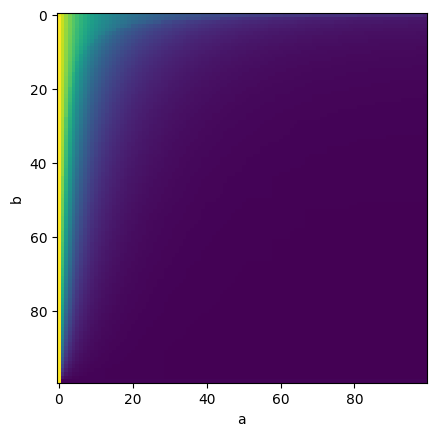

In [25]:
fig, ax = plt.subplots()

a = np.linspace(0, 1, 100)
b = np.linspace(0, 1, 100)
a2, b2 = np.meshgrid(a, b)

mat = tile(a2,b2) / len(entities_list)
ax.imshow(mat)

#levels = np.unique(mat).astype(float) - 0.5  # boundaries between integer plateaus

# Axis labels
ax.set_xlabel('a')
ax.set_ylabel('b')

ax.set_aspect('equal', adjustable='box')

plt.show()


In [ ]:
%matplotlib tk

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)  # leave space for sliders

a = np.linspace(0, 1, 101)
b = np.linspace(0, 1, 101)
a2, b2 = np.meshgrid(a, b)


prior_ax = fig.add_axes([0.2, 0.1, 0.6, 0.03])
prior_pos_slider = Slider(
    ax=prior_ax,
    label='$\pi_+$',
    valmin=0.0,
    valmax=1.0,
    valinit=0.5,
    valstep=0.01,
    orientation='horizontal'
)

proba_ax = fig.add_axes([0.2, 0.05, 0.6, 0.03])
proba_model_slider = Slider(
    ax=proba_ax,
    label='P(+)',
    valmin=0.0,
    valmax=1.0,
    valinit=0.5,
    valstep=0.01,
    orientation='horizontal'
)

def plot_tile(_=None):
    prior_val = prior_pos_slider.val
    proba_model_val = proba_model_slider.val

    id_entity = encode_id(prior_val, proba_model_val)
    id_entity = id_dict[id_entity]
    flavor = RankingFlavor(entity = entities_list[id_entity],
                       entity_list=entities_list,
                       name = "Rank Flavor - No Skill")

    tile = RankingTile(name = "Rank Tile - No Skill", 
                    parameterization=param,
                    flavor=flavor)
    mat = tile(a2, b2)

    ax.clear()
    ax.imshow(mat, extent=[0, 1, 0, 1], origin='lower', aspect='equal')
    fig.canvas.draw_idle()

prior_pos_slider.on_changed(plot_tile)
proba_model_slider.on_changed(plot_tile)

# initial draw
plot_tile()
plt.show()


<>:14: SyntaxWarning: invalid escape sequence '\p'
<>:14: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_1035104/3692487404.py:14: SyntaxWarning: invalid escape sequence '\p'
  label='$\pi_+$',


In [85]:
print(id_dict)

{'0.00_0.00': 0, '0.00_0.01': 1, '0.00_0.02': 2, '0.00_0.03': 3, '0.00_0.04': 4, '0.00_0.05': 5, '0.00_0.06': 6, '0.00_0.07': 7, '0.00_0.08': 8, '0.00_0.09': 9, '0.00_0.10': 10, '0.00_0.11': 11, '0.00_0.12': 12, '0.00_0.13': 13, '0.00_0.14': 14, '0.00_0.15': 15, '0.00_0.16': 16, '0.00_0.17': 17, '0.00_0.18': 18, '0.00_0.19': 19, '0.00_0.20': 20, '0.00_0.21': 21, '0.00_0.22': 22, '0.00_0.23': 23, '0.00_0.24': 24, '0.00_0.25': 25, '0.00_0.26': 26, '0.00_0.27': 27, '0.00_0.28': 28, '0.00_0.29': 29, '0.00_0.30': 30, '0.00_0.31': 31, '0.00_0.32': 32, '0.00_0.33': 33, '0.00_0.34': 34, '0.00_0.35': 35, '0.00_0.36': 36, '0.00_0.37': 37, '0.00_0.38': 38, '0.00_0.39': 39, '0.00_0.40': 40, '0.00_0.41': 41, '0.00_0.42': 42, '0.00_0.43': 43, '0.00_0.44': 44, '0.00_0.45': 45, '0.00_0.46': 46, '0.00_0.47': 47, '0.00_0.48': 48, '0.00_0.49': 49, '0.00_0.51': 50, '0.00_0.52': 51, '0.00_0.53': 52, '0.00_0.54': 53, '0.00_0.55': 54, '0.00_0.56': 55, '0.00_0.57': 56, '0.00_0.58': 57, '0.00_0.59': 58, '0.00_